In [1]:
# Load Library
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

In [3]:
df = pd.read_csv('D:/cap/capstone2/data/processed/processed.csv')

In [4]:
y = df.pop('event_coded')
y = np.array(y)
feature_list = list(df.columns)
X = np.array(df)

In [5]:
# Step2: Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [6]:
# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Acc: ', accuracy_score(y_test, y_pred))
print('Press weighted: ', precision_score(y_test, y_pred, average='weighted'))
print('Press micro: ', precision_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

Acc:  0.13882863340563992
Press weighted:  0.15861830560353907
Press micro:  0.15861830560353907
Confusion Matrix: 


array([[ 45,  82, 125, 262,  46],
       [126,  58,  60, 157,  79],
       [165,  58,  20, 168,  42],
       [436, 217, 204, 257, 149],
       [103,  93,  53, 154,  68]], dtype=int64)

In [7]:
# Step 4: Fit a Random Forest model
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

0.20452432599938022
Confusion Matrix: 


array([[  2,  33,  70, 420,  35],
       [ 49,  14,  15, 355,  47],
       [ 82,  30,   4, 305,  32],
       [250, 131, 183, 620,  79],
       [ 37,  45,  22, 347,  20]], dtype=int64)

In [8]:
from sklearn.model_selection import GridSearchCV

clf = AdaBoostClassifier()
#Creating a grid of hyperparameters
grid_params = {'n_estimators': [100,200,300]}
grid_object = GridSearchCV(estimator = clf, param_grid = grid_params, scoring = 'accuracy', cv = 20, n_jobs = -1)
grid_object.fit(X_train, y_train)
grid_object.best_params_

{'n_estimators': 100}

In [9]:
# Step 5: Fit a AdaBoost model
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

0.3780601177564301
Confusion Matrix: 


array([[  10,    8,    8,  529,    5],
       [   8,   13,   11,  437,   11],
       [  15,    8,    7,  417,    6],
       [  30,   12,   23, 1178,   20],
       [  11,    8,   13,  427,   12]], dtype=int64)

In [10]:
clf = GradientBoostingClassifier()
#Creating a grid of hyperparameters
grid_params = {'n_estimators': [100,200,300]}
grid_object = GridSearchCV(estimator = clf, param_grid = grid_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_object.fit(X_train, y_train)
grid_object.best_params_

{'n_estimators': 100}

In [11]:
# Step 6: Fit a Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

0.36163619460799507
Confusion Matrix: 


array([[   2,    7,   11,  534,    6],
       [   6,    9,    8,  446,   11],
       [  11,    4,    4,  428,    6],
       [  45,   20,   41, 1138,   19],
       [   9,   11,    6,  431,   14]], dtype=int64)

### PCA

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [30]:
from matplotlib.pyplot import figure

In [31]:
pca_view = PCA(n_components = 40)
pca_view.fit(X_train)

PCA(n_components=40)

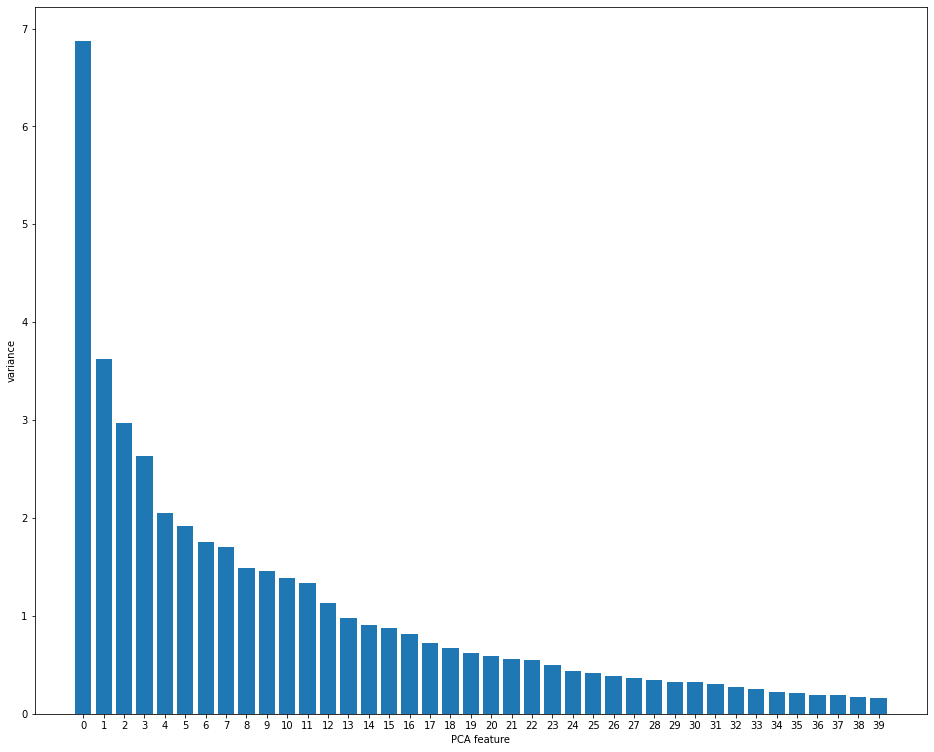

In [32]:

fig= plt.figure(figsize=(16,13))
features = range(pca_view.n_components_)
plt.bar(features, pca_view.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()


In [33]:
pca = PCA(n_components = 20)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)
pca_X_df = pd.DataFrame(pca_X_train)
pca_X_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7523,-1.178246,0.196310,0.281742,-0.171562,0.045828,0.067476,-0.037571,0.105696,0.218637,-0.537891,0.519981,0.057219,-0.284188,0.056738,0.240887,0.092095,0.370930,-0.161069,-0.283779,-0.111881
7524,-1.102547,-0.530778,0.687564,0.770362,-0.191658,-0.441767,0.394350,0.017347,-0.509301,0.050969,0.328465,-0.006085,-0.278533,-0.158063,0.492986,0.395302,0.440734,-1.810714,0.716598,-1.093763
7525,-1.097487,-0.342011,0.429459,0.725847,2.711868,-1.066561,0.161571,0.951588,-0.857435,0.413098,-0.095733,0.266692,0.535060,-0.390510,-0.276956,0.487463,0.124822,0.188314,-0.451749,0.582591
7526,-1.244525,-0.313812,0.711484,0.693814,-0.103665,-0.194768,0.028570,0.033072,0.325681,0.184242,-0.133517,-0.304546,-0.515443,0.531494,0.321972,0.113747,0.209401,-0.484161,-0.160124,-0.560414
7527,-1.535893,0.602965,0.544362,-0.364640,0.119387,0.157727,0.077364,0.073816,0.131922,-0.048532,0.069950,0.057703,-0.003218,0.076635,-0.022575,0.025533,0.193997,0.159442,-0.206028,0.167761


In [34]:
print('Explained variation per component: {}'.format((pca.explained_variance_ratio_)))
print('Total Explained variation: {}'.format((pca.explained_variance_ratio_.sum())))

Explained variation per component: [0.15430341 0.08137103 0.06672442 0.0592121  0.04605168 0.04312547
 0.03935353 0.03827297 0.03353759 0.03272863 0.0311406  0.02991838
 0.0254923  0.02191428 0.02041803 0.01962405 0.01823206 0.0163359
 0.0150234  0.0138364 ]
Total Explained variation: 0.8066162338082489


In [48]:
# Step 5: Fit a AdaBoost model
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(pca_X_train, y_train)
y_pred = clf.predict(pca_X_test)
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix: ')
confusion_matrix (y_test, y_pred)

0.3796095444685466
Confusion Matrix: 


array([[  12,    6,    8,  523,   11],
       [  12,   17,    3,  438,   10],
       [  16,   10,    2,  418,    7],
       [  25,   16,   12, 1186,   24],
       [   6,   11,    3,  443,    8]], dtype=int64)

## SVM OVO

In [36]:
from sklearn import svm

In [55]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
linear_pred = linear.predict(pca_X_test)
accuracy_lin = linear.score(pca_X_test, y_test)

In [40]:
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
poly_pred = rbf.predict(pca_X_test)
accuracy_poly = rbf.score(pca_X_test, y_test)

In [41]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
rbf_pred = poly.predict(pca_X_test)
accuracy_rbf = poly.score(pca_X_test, y_test)

In [42]:
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(pca_X_train, y_train)
sig_pred = sig.predict(pca_X_test)
accuracy_sig = sig.score(pca_X_test, y_test)

In [56]:
print('Accuracy Linear Kernel: ', accuracy_lin)
print('Accuracy Polynomial Kernel: ', accuracy_poly)
print('Accuracy Radial Basis Kernel: ', accuracy_rbf)
print('Accuracy Sigmoid Kernel: ', accuracy_sig)

Accuracy Linear Kernel:  0.39107530213820885
Accuracy Polynomial Kernel:  0.341183762008057
Accuracy Radial Basis Kernel:  0.3805392004958165
Accuracy Sigmoid Kernel:  0.35512860241710564


In [46]:
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[   0    0    0  560    0]
 [   0    0    0  480    0]
 [   0    0    0  453    0]
 [   0    0    0 1262    1]
 [   0    0    0  471    0]]
[[   0    8   10  534    8]
 [   7    4    3  455   11]
 [  19    6    1  422    5]
 [  85   27   41 1096   14]
 [   7    8    2  454    0]]
[[   4    2    4  547    3]
 [   4    8    7  454    7]
 [   9    2    1  440    1]
 [  20    8   16 1212    7]
 [   5   10    4  449    3]]
[[  32   27    2  483   16]
 [  36   23    4  391   26]
 [  34   25    0  379   15]
 [  90   62    2 1073   36]
 [  22   17    2  412   18]]


## SVM OVR

In [49]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
linear_pred = linear.predict(pca_X_test)
accuracy_lin = linear.score(pca_X_test, y_test)

In [50]:
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
poly_pred = rbf.predict(pca_X_test)
accuracy_poly = rbf.score(pca_X_test, y_test)

In [51]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
rbf_pred = poly.predict(pca_X_test)
accuracy_rbf = poly.score(pca_X_test, y_test)

In [52]:
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovr').fit(pca_X_train, y_train)
sig_pred = sig.predict(pca_X_test)
accuracy_sig = sig.score(pca_X_test, y_test)

In [53]:
print('Accuracy Linear Kernel: ', accuracy_lin)
print('Accuracy Polynomial Kernel: ', accuracy_poly)
print('Accuracy Radial Basis Kernel: ', accuracy_rbf)
print('Accuracy Sigmoid Kernel: ', accuracy_sig)

Accuracy Linear Kernel:  0.39107530213820885
Accuracy Polynomial Kernel:  0.341183762008057
Accuracy Radial Basis Kernel:  0.3805392004958165
Accuracy Sigmoid Kernel:  0.35512860241710564


In [54]:
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[   0    0    0  560    0]
 [   0    0    0  480    0]
 [   0    0    0  453    0]
 [   0    0    0 1262    1]
 [   0    0    0  471    0]]
[[   0    8   10  534    8]
 [   7    4    3  455   11]
 [  19    6    1  422    5]
 [  85   27   41 1096   14]
 [   7    8    2  454    0]]
[[   4    2    4  547    3]
 [   4    8    7  454    7]
 [   9    2    1  440    1]
 [  20    8   16 1212    7]
 [   5   10    4  449    3]]
[[  32   27    2  483   16]
 [  36   23    4  391   26]
 [  34   25    0  379   15]
 [  90   62    2 1073   36]
 [  22   17    2  412   18]]
